In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib 을 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_train = pd.read_csv('C:/Users/KimDongyoung/Desktop/GBT해커톤/GBT_hackerton/data/train_df_1009_v2.csv')
df_test = pd.read_csv('C:/Users/KimDongyoung/Desktop/GBT해커톤/GBT_hackerton/data/test_df_1009_v2.csv')

In [11]:
df_train.columns

Index(['ID', '분류', '제목', '키워드'], dtype='object')

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [19]:
tfidfv = TfidfVectorizer()

tfidfv.fit(df_train['키워드'])

TfidfVectorizer()

In [20]:
# 변환
X_train = tfidfv.transform(df_train['키워드'])

In [21]:
X_train.shape

(54314, 200005)

In [22]:
# 단어 사전
feature_names = tfidfv.get_feature_names_out()
print(len(feature_names))
feature_names[:10]

200005


array(['00065', '000가', '000페소', '000필지', '00446', '007작전', '00특례시',
       '02안산', '045마이크로미터', '04재개발'], dtype=object)

In [23]:
# np.sum 으로 위에서 구한 train_feature_vector 의 값을 모두 더합니다. axis=0 으로 합니다. 
dist = np.sum(X_train, axis=0)

vocab_count = pd.DataFrame(dist, columns=feature_names)
vocab_count

,00065,000가,000페소,000필지,00446,007작전,00특례시,02안산,045마이크로미터,04재개발,...,李丙燾,李中仁,李之浩,李健熙,李壽興,臨場,臨場記,立春,立春大吉,糖醋肉
0,0.192024,0.062663,0.068558,0.1216,0.054378,0.052334,0.110301,0.036056,0.021904,0.073134,...,0.034465,0.208272,0.025037,0.046749,0.034465,0.115349,0.115349,0.347317,0.323988,0.026376


In [24]:
vocab_count.T[0].sort_values(ascending=False).head()

반도체    1217.374688
사업     1074.127016
조성      720.607326
도시      665.841608
확진자     648.222735
Name: 0, dtype: float64

In [27]:
# DecisionTreeClassifier 를 불러옵니다.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, max_depth=5)
model

DecisionTreeClassifier(max_depth=5, random_state=42)

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the '키워드' column
df_train['키워드_encoded'] = label_encoder.fit_transform(df_train['키워드'])

# Display the first few rows to verify
df_train[['키워드', '키워드_encoded']].head()

,키워드,키워드_encoded
0,용인문화재단 인문학 콘서트 뮤지컬 이야기 개최 인문학 콘서트 뮤지컬 이야기 용인문화...,30184
1,농촌 테마파크 단체 체험객 체험료 체험일 기준 용인시통합예약사이트 접수 용인특례시 ...,10424
2,노후 주택 에너지 성능 개선 신청 연장 용인시청 노후 건축물 환경친화적 개선 온실 ...,10109
3,수원 고양시 특례시 지정 도시경쟁력 증가 도내 인구 수원 고양 특례시 지정 골자 지...,23394
4,스페인 미국 국제 명예 자문관 위촉 역할 대외 홍보 권태면 주코스타리카 대사 이정관...,24379


In [29]:
y_train = df_train['키워드_encoded']

In [30]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\tree\_export.py:664: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\tree\_export.py:664: UserWarning: Glyph 50472 (\N{HANGUL SYLLABLE SSI}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\tree\_export.py:664: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\tree\_export.py:664: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python

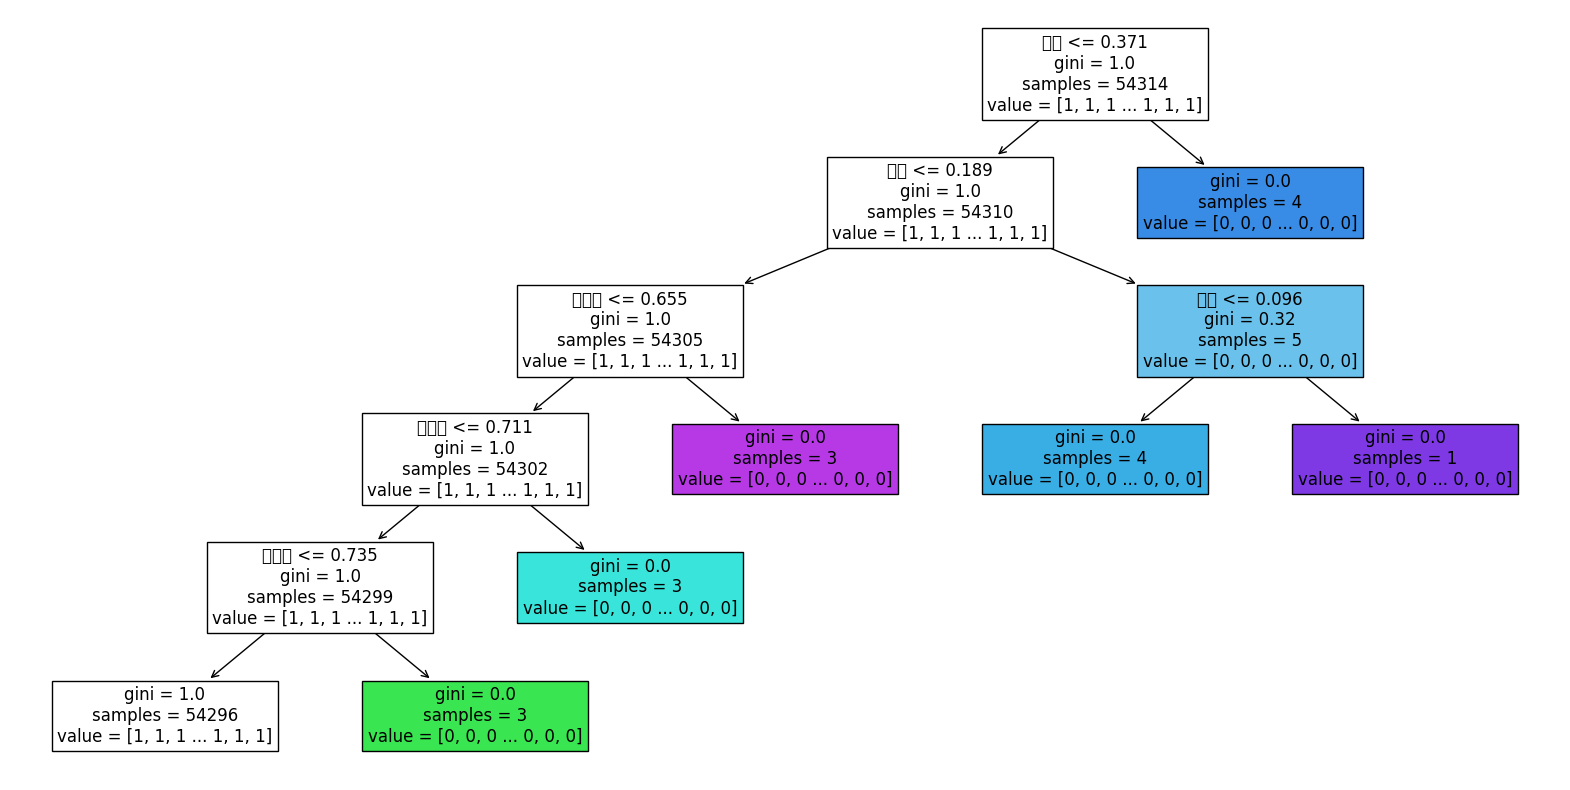

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=feature_names, 
          max_depth=5, fontsize=12, filled=True)
plt.show()